<a href="https://colab.research.google.com/github/aborundiya/CNN/blob/master/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transform
from torch import nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Import Data set

In [3]:
trainset = torchvision.datasets.CIFAR10('./data',train=True, download=True, transform=transform.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
classes = ("plane","automobile","bird","cat","deer","dog","frog","horse","ship","truck")
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [0]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet,self).__init__()
    self.cnnModel = nn.Sequential(
        nn.Conv2d(3,6,5),     # (N , 3, 32, 32 ) - > ( N , 6, 28,28)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),  # (N,6,28,28)  - > ( N, 6, 14,14)
        nn.Conv2d(6,16,5) ,       # ( N, 6, 14, 14 ) - > (N, 16,10, 10)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2)  # (N,16, 10,10) -> (N,16, 5, 5,)
    )
    self.fcModel = nn.Sequential(
        nn.Linear(400,120),     # (N, 400)  -> ( N , 120)
        nn.ReLU(),
        nn.Linear(120,84),     # (N,120)  -> ( N ,84)
        nn.ReLU(),
        nn.Linear(84,10)      #(N,84 )  -> ( N ,10)
    )

  def forward(self,x):
    #print(x.shape)
    x = self.cnnModel(x)
    #print(x.shape)
    x = x.view(x.size(0),-1)  # flatten the Tensor with same size of N
    #print(x.shape)
    x = self.fcModel(x)
    #print(x.shape)
    return x


In [0]:
net = LeNet()
out = net(images)

In [25]:
print(out)

tensor([[ 0.0122,  0.0156, -0.1046, -0.0247,  0.0788, -0.0811, -0.0403, -0.0756,
         -0.0060, -0.0037],
        [ 0.0220,  0.0149, -0.1072, -0.0211,  0.0837, -0.0749, -0.0410, -0.0823,
         -0.0026,  0.0060],
        [ 0.0111,  0.0141, -0.1053, -0.0214,  0.0869, -0.0807, -0.0369, -0.0744,
          0.0013,  0.0036],
        [ 0.0160,  0.0175, -0.0983, -0.0237,  0.0812, -0.0803, -0.0405, -0.0817,
         -0.0071,  0.0031]], grad_fn=<AddmmBackward>)


In [0]:
max_value , pred_class = torch.max(out.data,1)

# Training the LeNet with CIFAR10 dataset

In [28]:
batch_size = 256 
trainSet = torchvision.datasets.CIFAR10('./data',train=True,download=True,transform=transform.ToTensor())
trainLoader = torch.utils.data.DataLoader(trainSet,batch_size=batch_size,shuffle=True)
testSet = torchvision.datasets.CIFAR10('./data',train=False,download=True,transform=transform.ToTensor())
testLoader = torch.utils.data.DataLoader(testSet,batch_size=batch_size,shuffle=False)



Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluate(dataLoader):
  total , correct = 0 ,0 
  for data in dataLoader:
    inputs, labels = data 
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _,pred = torch.max(outputs.data,1)
    total += labels.size(0)
    correct +=(pred == labels).sum().item()
  return 100 * (correct / total)

In [0]:
net = LeNet().to(device)
import torch.optim as optim 
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())


Epoch 0 16 , Test acc : 35.66, Train Acc : 35.60
Epoch 1 16 , Test acc : 44.15, Train Acc : 44.68
Epoch 2 16 , Test acc : 46.82, Train Acc : 46.86
Epoch 3 16 , Test acc : 49.36, Train Acc : 49.73
Epoch 4 16 , Test acc : 50.31, Train Acc : 51.03
Epoch 5 16 , Test acc : 52.14, Train Acc : 52.95
Epoch 6 16 , Test acc : 51.66, Train Acc : 52.81
Epoch 7 16 , Test acc : 54.13, Train Acc : 55.09
Epoch 8 16 , Test acc : 54.43, Train Acc : 55.82
Epoch 9 16 , Test acc : 55.27, Train Acc : 56.64
Epoch 10 16 , Test acc : 56.09, Train Acc : 57.72
Epoch 11 16 , Test acc : 55.84, Train Acc : 57.93
Epoch 12 16 , Test acc : 55.72, Train Acc : 58.28
Epoch 13 16 , Test acc : 57.41, Train Acc : 60.26
Epoch 14 16 , Test acc : 57.85, Train Acc : 60.68
Epoch 15 16 , Test acc : 57.79, Train Acc : 61.04


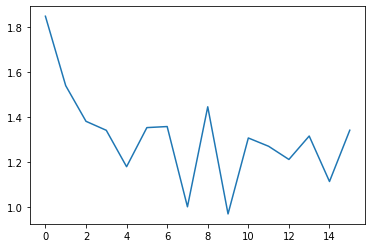

CPU times: user 4min 3s, sys: 816 ms, total: 4min 4s
Wall time: 4min 4s


In [41]:
%%time
loss_arr = []
loss_arr_epoch = []
max_epochs = 16 

for epoch in range(max_epochs):
  for i , data in enumerate(trainLoader,0):
    inputs , labels = data 
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_arr_epoch.append(loss.item())
  print("Epoch %d %d , Test acc : %0.2f, Train Acc : %0.2f" % (epoch, max_epochs, evaluate(testLoader),evaluate(trainLoader)))
plt.plot(loss_arr_epoch)
plt.show()

#Basic Visulaization

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

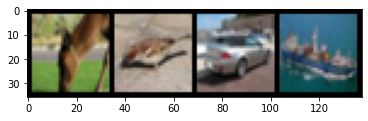

In [43]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [45]:
out - net(images)
print(out.shape)

torch.Size([4, 10])


In [46]:
out = net.cnnModel[0](images)
print(out.shape)

torch.Size([4, 6, 28, 28])


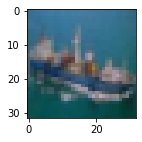

In [47]:
image_id = 3 
plt.figure(figsize=(2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


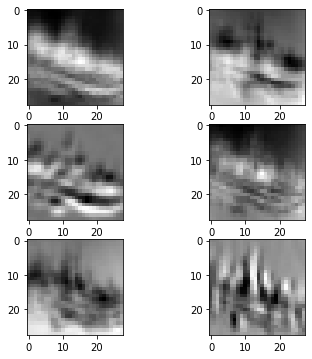

In [48]:
plt.figure(figsize=(6,6))
plt.subplot(321)
for i in range(6):
  ax1 = plt.subplot(3,2,i+1)
  plt.imshow(out[image_id, i , : ,:].detach().numpy(), cmap = 'binary')